### DSC550 Exercise 4.2
#### Madison Christiansen

In [29]:
# load packages 
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# load data 
carsdf = pd.read_csv('/Users/madisonchristiansen/Desktop/auto-mpg.csv')   

# drop car name column
carsdf.drop(columns=['car name'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [25]:
# create dummy variables for original horsepower column
pd.get_dummies(carsdf['horsepower']).head()

,100,102,103,105,107,108,110,112,113,115,...,90,91,92,93,94,95,96,97,98,?
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# clean horsepower column 
carsdf['horsepower'] = pd.to_numeric(carsdf['horsepower'], errors='coerce')
# finding the median 
carsdf['horsepower'].median()
# replacing mean 
carsdf['horsepower'] = carsdf['horsepower'].fillna(93.5)

carsdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [27]:
# correlation coefficient 
carsdf.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


#### When looking at the correlation coefficient you can see that there is no highly positive correlation betweeen a variable and the mpg. Although, there is multiple highly negative correlations; cylinders, displacement, horsepower, and weight. 

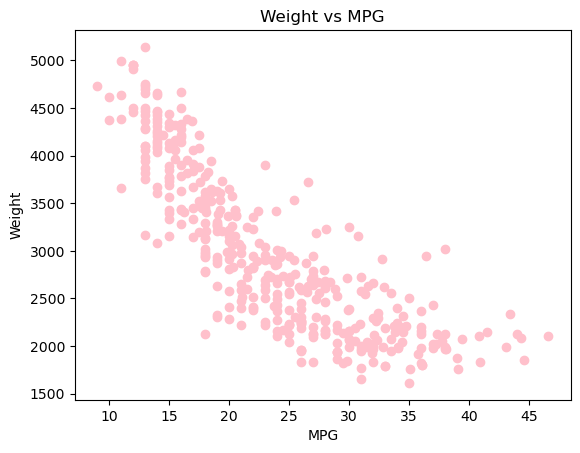

In [31]:
# plot weight vs mpg
plt.scatter(carsdf['mpg'], carsdf['weight'], c='pink')
plt.title("Weight vs MPG")
plt.xlabel("MPG")
plt.ylabel("Weight")
plt.show()

#### You can see that there is a strong negative correlation when looking at the MPG vs Weight graph. This was expected because the correlation coefficient showed the relationship between the two as -0.83, indicating a strong negative correlation.

In [86]:
# split data into training and test
X=carsdf.drop('mpg', axis='columns')
y=carsdf.mpg

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [147]:
from sklearn.model_selection import train_test_split # packages

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [148]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
303,4,85.0,65.0,2020,19.2,79,3,0.0
347,4,85.0,65.0,1975,19.4,81,3,0.0
149,4,120.0,97.0,2489,15.0,74,3,0.0
100,6,250.0,88.0,3021,16.5,73,1,0.0
175,4,90.0,70.0,1937,14.0,75,2,0.0
...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395,18.0,82,1,0.0
320,4,119.0,92.0,2434,15.0,80,3,0.0
15,6,198.0,95.0,2833,15.5,70,1,0.0
125,6,198.0,95.0,3102,16.5,74,1,0.0


In [149]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
331,4,97.0,67.0,2145,18.0,80,3,0.0
111,3,70.0,90.0,2124,13.5,73,3,0.0
350,4,105.0,63.0,2215,14.9,81,1,0.0
205,4,97.0,75.0,2155,16.4,76,3,0.0
56,4,91.0,70.0,1955,20.5,71,1,0.0
...,...,...,...,...,...,...,...,...
304,4,91.0,69.0,2130,14.7,79,2,0.0
187,8,305.0,140.0,4215,13.0,76,1,0.0
166,8,302.0,129.0,3169,12.0,75,1,0.0
64,8,318.0,150.0,4135,13.5,72,1,0.0


In [150]:
y_train

303    31.8
347    37.0
149    24.0
100    18.0
175    29.0
       ... 
369    34.0
320    37.0
15     22.0
125    20.0
265    17.5
Name: mpg, Length: 318, dtype: float64

In [151]:
y_test

331    33.8
111    18.0
350    34.7
205    28.0
56     26.0
       ... 
304    37.3
187    17.5
166    13.0
64     15.0
27     11.0
Name: mpg, Length: 80, dtype: float64

In [152]:
# train an ordinary linear regression on trainning data
from sklearn.linear_model import LinearRegression # package
import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print('The set of coefficients:', str(lin_reg.coef_))
print('The intercept:', str(lin_reg.intercept_))



The set of coefficients: [-0.4026195   0.01986123 -0.0127084  -0.00683058  0.11532112  0.76247878
  1.4773261   0.        ]
The intercept: -18.463606249399096


In [153]:
# R2 calculation 
print("Value of R-squared:", lin_reg.score(X_train,y_train))

# other calculations
yp = lin_reg.predict(X)

rmse = np.sqrt(np.mean(np.square(y-yp)))
mae = np.mean(abs(y-yp))

print("Value of MAE:",mae)
print("Value of RMSE:", rmse)


Value of R-squared: 0.8273561078527634
Value of MAE: 2.5256581172542263
Value of RMSE: 3.306796020989028


#### Based on the R-squared calculation you can see that our model successfully explained 82.7% variance in the dataset. Based on the RMSE you can see that the average difference between the two values predicted by the model and the actual values is 3.31, which is high meaning the model couldnt find a solution. The MAE is at 2.53 meaning that this also shows the model is not a good fit. 

In [154]:
from sklearn import utils

y_train = (utils.multiclass.type_of_target(y_train.astype('int')))
yp = (utils.multiclass.type_of_target(yp.astype('int')))

In [1]:
# build a different model
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# logistic regression
model2 = LogisticRegression(C=0.1, max_iter = 500)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print('Weight Coeffiencent:', model.coef_)
print('Bias:', model.intercept_)

# R2 calculation 
print("Value of R-squared:", model2.score(X_train,y_train))

# other calculations
yp = model2.predict(X)

rmse = np.sqrt(np.mean(np.square(y-yp)))
mae = np.mean(abs(y-yp))

print("Value of MAE:",mae)
print("Value of RMSE:", rmse)

NameError: name 'X_train' is not defined